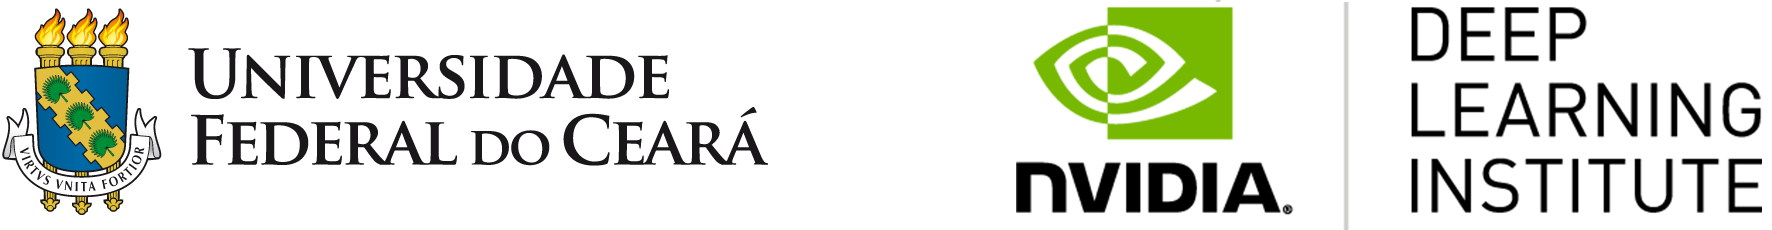

## Classificação de Imagens com o Dataset Médico (Pneumonia)

Disciplina: Sistema Distribuidos

Aluno: Ernesto Gurgel Valente Neto

Prof. Dr. Julio Anjos

## Dataset Médico (Pneumologia)



Reconhecimento
[Dataset](https://data.mendeley.com/datasets/rscbjbr9sj/2)

License: CC BY 4.0
[Citation](http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)

[DOI](https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)


## Carregando as bibliotecas (pyhton)

In [ ]:
#Importação das bibliotecas
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os
import seaborn as sns
import cv2
from PIL import Image
from glob import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Carregando dados de serviço da nuvem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_path = "/content/drive/MyDrive/archive_pneumonia/chest_xray"

In [ ]:
train_normal = glob(os.path.join(main_path, "train", "NORMAL", "*.jpeg"))
train_pneumonia = glob(os.path.join(main_path, "train", "PNEUMONIA", "*.jpeg"))

test_normal = glob(os.path.join(main_path, "test", "NORMAL", "*.jpeg"))
test_pneumonia = glob(os.path.join(main_path, "test", "PNEUMONIA", "*.jpeg"))

val_normal = glob(os.path.join(main_path, "val", "NORMAL", "*.jpeg"))
val_pneumonia = glob(os.path.join(main_path, "val", "PNEUMONIA", "*.jpeg"))

Este código está criando três DataFrames do pandas (**df_train, df_test e df_val**)

a partir das listas de imagens de treinamento, teste e validação que foram previamente definidas.

Cada DataFrame tem duas colunas:

* A coluna 'class' indica a classe da imagem. As imagens são rotuladas como
* 'Normal' ou 'Pneumonia'. A expressão `['Normal'] * len(train_normal)` cria uma lista que contém a string 'Normal' repetida o número de vezes igual ao tamanho de `train_normal`, que é o número de imagens normais no conjunto de treinamento. O mesmo é feito para a classe 'Pneumonia' com `['Pneumonia'] * len(train_pneumonia)`. As duas listas são então concatenadas juntas com o operador `+`, resultando em uma lista que tem a string 'Normal' para cada imagem normal e a string 'Pneumonia' para cada imagem com pneumonia.
*  A coluna 'image' contém os caminhos para as imagens. Similarmente à coluna 'class', os caminhos para as imagens normais e de pneumonia são concatenados juntos para formar uma única lista.

In [ ]:
df_train = pd.DataFrame({
    'class': ['Normal'] * len(train_normal) + ['Pneumonia'] * len(train_pneumonia),
    'image': train_normal + train_pneumonia
})

df_test = pd.DataFrame({
    'class': ['Normal'] * len(test_normal) + ['Pneumonia'] * len(test_pneumonia),
    'image': test_normal + test_pneumonia
})

df_val = pd.DataFrame({
    'class': ['Normal'] * len(val_normal) + ['Pneumonia'] * len(val_pneumonia),
    'image': val_normal + val_pneumonia
})

## Explorando os dados do MÉDICOS

O método shape retorna uma tupla representando as dimensões do DataFrame. A primeira entrada da tupla é o **número de linhas** e a **segunda é o número de colunas**.

* df_train.shape retorna o formato do DataFrame de treinamento, que contém as imagens e rótulos que serão usados para treinar o modelo.
* df_test.shape retorna o formato do DataFrame de teste, que contém as imagens e rótulos que serão usados para avaliar a performance do modelo depois que ele foi treinado.
* df_val.shape retorna o formato do DataFrame de validação, que contém as imagens e rótulos que podem ser usados para ajustar os parâmetros do modelo durante o treinamento (embora a maneira como esses conjuntos de dados são usados possa variar dependendo da abordagem específica de modelagem usada).

In [ ]:
print("df_train: ", df_train.shape)
print("df_test: ", df_test.shape)
print("df_val: ", df_val.shape)

df_train:  (5216, 2)
df_test:  (624, 2)
df_val:  (16, 2)


A função dtypes em pandas retorna uma série com o tipo de dado de cada coluna. O índice da série é o nome da coluna.

In [ ]:
print("df_train", df_train.dtypes)
print("\n df_test:\n", df_test.dtypes)
print("\ndf_val:\n", df_val.dtypes)

df_train class    object
image    object
dtype: object

 df_test:
 class    object
image    object
dtype: object

df_val:
 class    object
image    object
dtype: object


In [ ]:
print("df_train:\n", pd.concat([df_train.head(5), df_train.tail(5)]))
print("\ndf_test:\n", pd.concat([df_test.head(5), df_test.tail(5)]))
print("\ndf_val:\n", pd.concat([df_val.head(5), df_val.tail(5)]))

df_train:
           class                                              image
0        Normal  /content/drive/MyDrive/archive_pneumonia/chest...
1        Normal  /content/drive/MyDrive/archive_pneumonia/chest...
2        Normal  /content/drive/MyDrive/archive_pneumonia/chest...
3        Normal  /content/drive/MyDrive/archive_pneumonia/chest...
4        Normal  /content/drive/MyDrive/archive_pneumonia/chest...
5227  Pneumonia  /content/drive/MyDrive/archive_pneumonia/chest...
5228  Pneumonia  /content/drive/MyDrive/archive_pneumonia/chest...
5229  Pneumonia  /content/drive/MyDrive/archive_pneumonia/chest...
5230  Pneumonia  /content/drive/MyDrive/archive_pneumonia/chest...
5231  Pneumonia  /content/drive/MyDrive/archive_pneumonia/chest...

df_test:
          class                                              image
0       Normal  /content/drive/MyDrive/archive_pneumonia/chest...
1       Normal  /content/drive/MyDrive/archive_pneumonia/chest...
2       Normal  /content/drive/MyDrive/arch

In [ ]:
df_train = pd.concat([df_train, df_val], axis=0)
df_train = df_train.reset_index(drop=True)

In [ ]:
df_train

,class,image
0,Normal,/content/drive/MyDrive/archive_pneumonia/chest...
1,Normal,/content/drive/MyDrive/archive_pneumonia/chest...
2,Normal,/content/drive/MyDrive/archive_pneumonia/chest...
3,Normal,/content/drive/MyDrive/archive_pneumonia/chest...
4,Normal,/content/drive/MyDrive/archive_pneumonia/chest...
...,...,...
5227,Pneumonia,/content/drive/MyDrive/archive_pneumonia/chest...
5228,Pneumonia,/content/drive/MyDrive/archive_pneumonia/chest...
5229,Pneumonia,/content/drive/MyDrive/archive_pneumonia/chest...
5230,Pneumonia,/content/drive/MyDrive/archive_pneumonia/chest...


## Explorando os dados do médicos / Definição de funções de plot das imagens

As especificações a seguir representam o uso da função (plot_images) ao qual imprime imagens.

def plot_images(df, start_index, num_images):


*   df = é qual o dataframe será passado plotagem.
*   start_index = é a posição inicial do array.
*   num_images = é quantidade de imagens que serão plotadas








In [ ]:
#Plot o plot_images(DATA FRAME PARA PRINT, INDEX XDO DATA FRASE, QTD IMAGEM PARA PLOT)
def plot_images(df, start_index, num_images):
    fig = plt.figure(figsize=(10, 10))
    if start_index + num_images > len(df):
        num_images = len(df) - start_index
    for i in range(num_images):
        image_path = df['image'][start_index + i]
        image_class = df['class'][start_index + i] #Pegando a classe da imagem
        try:
            image = Image.open(image_path)
            ax = fig.add_subplot(num_images, 1, i+1)
            ax.imshow(image, cmap='gray')
            ax.set_title(f'Image {start_index + i}, Class: {image_class}')  #Imprimindo o titulo da classe da imagem
            ax.axis('off')
        #Excessão e tratamento de excessão em um acesso invalido.
        except (IOError, OSError) as e:
            print(f"Erro ao carregar imagem {start_index + i}: {e}")

    plt.tight_layout()
    plt.show()

### Analise das imagens médicas da classe "Normal"

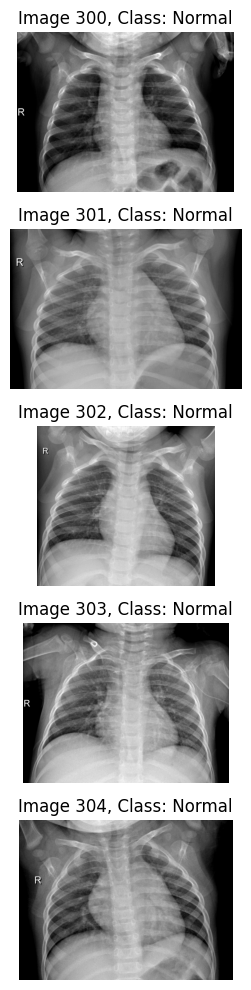

In [ ]:
#Plot o plot_images(DATA FRAME PARA PRINT, INDEX XDO DATA FRASE, QTD IMAGEM PARA PLOT)
plot_images(df_train, start_index=300, num_images=5)

### Analise das imagens médicas da classe "Pneumonia"

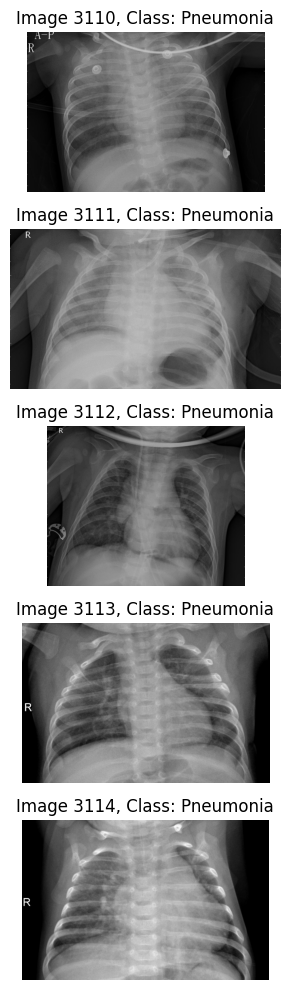

In [ ]:
#Plot o plot_images(DATA FRAME PARA PRINT, INDEX XDO DATA FRASE, QTD IMAGEM PARA PLOT)
plot_images(df_train, start_index=3110, num_images=5)

### Explorando os dados do médicos / Definição de funções de distribuição

As especificações a seguir representam o uso da função (plot_images) ao qual imprime imagens. A função def plot_class_distribution(df):


*   Apresenta  a a distribuição do plot_class_distribution("DATA FRAME SELECIONADO")

In [ ]:
def plot_class_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='class')
    plt.title('Distribuição das Classes')
    plt.show()

### Dataframe de treinamento

Analise da distribuição dos dados de treinamento das classes:

*   Normal; e
*   Pneumonia;

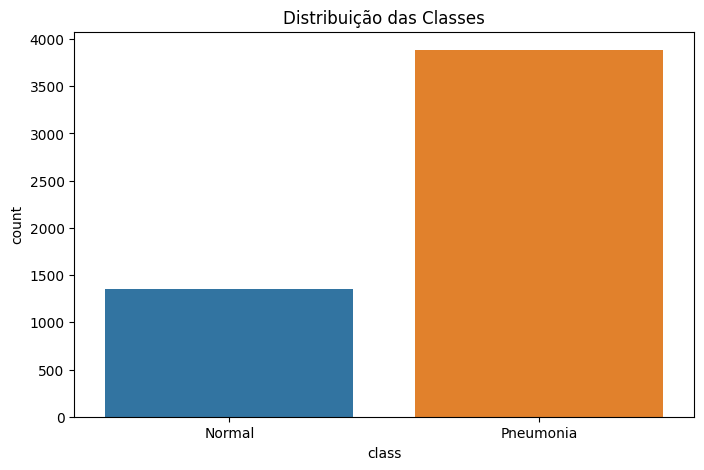

In [ ]:
plot_class_distribution(df_train)

### Dataframe de Validação

Analise da distribuição dos dados de validação das classes:

*   Normal; e
*   Pneumonia;



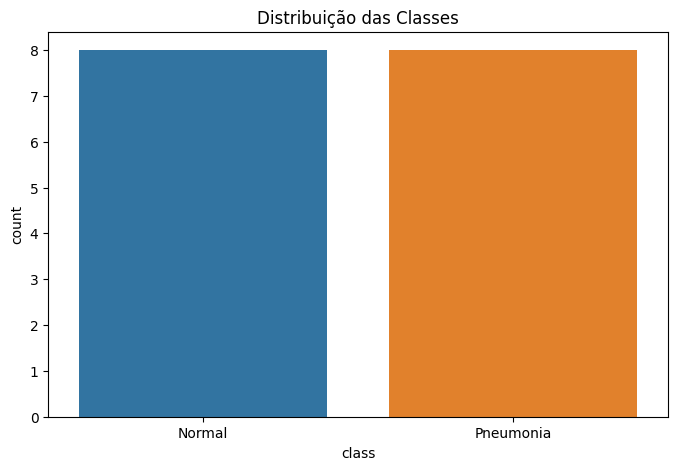

In [ ]:
plot_class_distribution(df_val)

# Preparação dos Dados para o Treinamento


No aprendizado profundo, muitas vezes precisamos ajustar nossos dados para que fiquem no formato mais adequado para treinar nossos modelos. No caso específico da classificação de imagens, há três etapas importantes que precisamos realizar para preparar nossos dados para o treinamento:

* "Achatar" os dados da imagem: Nesta etapa, transformamos nossas imagens (que são matrizes bidimensionais) em vetores unidimensionais. Isso simplifica a forma como as imagens são fornecidas ao modelo para treinamento.

* Normalizar os dados da imagem: Aqui, ajustamos os valores de cada pixel da imagem para que fiquem em uma escala comum. Isso ajuda o modelo a processar as informações mais eficientemente.

* Categorizar os rótulos: Finalmente, transformamos os rótulos das classes em uma representação binária, que é mais fácil para o modelo trabalhar. Por exemplo, em vez de representar uma classe como 'classe 3', representamos como um vetor onde o terceiro elemento é 1 e todos os outros são 0.

### Achatando os Dados da Imagem

Embora os modelos de aprendizado profundo sejam totalmente capazes de lidar com dados multidimensionais, como é o caso de imagens, a aplicação da operação de [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) para "achatar" as imagens e transformá-las em uma única matriz contínua de pixels é uma prática comum. Essa operação simplifica a estrutura de dados de entrada e pode facilitar o processo de treinamento, especialmente ao lidar com modelos mais simples ou ao iniciar a modelagem.

* No nosso caso específico, uma imagem de dimensões 28x28 pixels é transformada em uma matriz unidimensional de 784 elementos (28x28 = 784). Esta transformação é comumente referida como "nivelamento" da imagem.

* A função `reshape` é uma ferramenta poderosa neste processo, permitindo que reformulemos a estrutura dos nossos dados para se adequar às necessidades do nosso modelo. A operação de reshape é crucial para garantir que os nossos dados de entrada estejam na forma correta antes de alimentá-los no modelo.

In [ ]:
def preprocess_images(df, image_size=(28,28)):
    image_list = []
    total_images = df.shape[0]
    for i, image_path in enumerate(df['image']):
        img = Image.open(image_path)
        #Redimensiona a imagem para 28x28 pixels usando o método resize.
        img = img.resize(image_size)
        #Converte a imagem para escala de cinza com o método convert('L'). Isso é feito porque as imagens em escala de cinza são mais simples de lidar
        #(uma única camada de intensidades de pixel, em vez de três camadas de cores em imagens coloridas) e são suficientes para muitas tarefas de processamento
        #de imagem e aprendizado de máquina.
        img = img.convert('L')
        img_array = np.array(img)
        #Achatando a imagem usando reshape(-1). Isso transforma a matriz 2D em uma matriz 1D (um vetor) de elementos.
        #Como o tamanho da imagem é 28x28 pixels, o vetor terá 784 elementos.
        img_array = img_array.reshape(-1)
        image_list.append(img_array)
        if (i+1) % 100 == 0 or i+1 == total_images:
            print(f'Processando {i+1} de {total_images} imagens ({(i+1)/total_images*100:.2f}%)')
    images = np.array(image_list)
    return images

### Transformação dos dados de Treinamento

In [ ]:
print("Processamento dos Dados de Treinamento:\n")
x_train = preprocess_images(df_train)

Processed 100 of 5232 images (1.91%)
Processed 200 of 5232 images (3.82%)
Processed 300 of 5232 images (5.73%)
Processed 400 of 5232 images (7.65%)
Processed 500 of 5232 images (9.56%)
Processed 600 of 5232 images (11.47%)
Processed 700 of 5232 images (13.38%)
Processed 800 of 5232 images (15.29%)
Processed 900 of 5232 images (17.20%)
Processed 1000 of 5232 images (19.11%)
Processed 1100 of 5232 images (21.02%)
Processed 1200 of 5232 images (22.94%)
Processed 1300 of 5232 images (24.85%)
Processed 1400 of 5232 images (26.76%)
Processed 1500 of 5232 images (28.67%)
Processed 1600 of 5232 images (30.58%)
Processed 1700 of 5232 images (32.49%)
Processed 1800 of 5232 images (34.40%)
Processed 1900 of 5232 images (36.31%)
Processed 2000 of 5232 images (38.23%)
Processed 2100 of 5232 images (40.14%)
Processed 2200 of 5232 images (42.05%)
Processed 2300 of 5232 images (43.96%)
Processed 2400 of 5232 images (45.87%)
Processed 2500 of 5232 images (47.78%)
Processed 2600 of 5232 images (49.69%)


### Transformação dos dados de Validação

In [ ]:
print("\nProcessamento dos Dados de Validação:\n")
x_val = preprocess_images(df_val)


Processamento dos Dados de Validação:

Processed 16 of 16 images (100.00%)


### Validação da transformação

Nessa etapa verificamos se os dataframes de treinamento e teste foram corretamente transformados.


#### Validação da transformação dos dados de treinamento

In [ ]:
x_train.shape

(5232, 784)

In [ ]:
x_train[0]

array([  0,   0,  39, 102, 131, 138, 125, 164, 165, 174, 210, 208, 212,
       211, 198, 186, 158, 134, 143, 147, 139, 114, 120, 116, 109,  67,
         5,   0,   0,   0,  34, 100, 122, 135, 125, 131, 160, 186, 190,
       190, 192, 181, 158, 162, 151, 164, 162, 146, 130, 128, 128, 101,
       101,  59,   5,   0,   0,   0,  26,  92, 109, 132, 148, 133, 119,
       142, 181, 180, 176, 164, 142, 157, 153, 150, 160, 137, 129, 147,
       158, 110,  89,  52,   6,   0,   0,   0,  22,  79, 106, 147, 169,
       143, 131, 156, 145, 153, 162, 154, 145, 164, 161, 118, 146, 173,
       142, 152, 163, 116,  81,  50,   7,   0,  26,  33,  16,  67,  98,
       145, 172, 146, 165, 169, 101, 117, 155, 177, 169, 186, 143,  90,
       100, 130, 164, 167, 152, 118,  77,  50,   8,   0,  31,  39,  15,
        62,  93, 133, 160, 173, 160, 131, 101, 114, 159, 180, 177, 183,
       162,  92,  86, 108, 154, 189, 143, 118,  81,  49,  10,   0,   0,
         0,  18,  57,  94, 127, 153, 194, 147, 107,  77,  87, 15

#### Validação da transformação dos dados de valdiação

In [ ]:
x_val.shape

(16, 784)

In [ ]:
x_val[0]

array([ 64,  16,  10,   1,   0,   0,   1,  88, 176, 195, 207, 217, 218,
       219, 219, 216, 213, 197, 158,  64,   1,   0,   0,   0,   0,   3,
         7,  12,  66,  52,  40,  22,   3,   0,   0,  50, 154, 187, 197,
       212, 214, 213, 215, 213, 202, 181, 144,  20,   0,   0,   0,   3,
        15,  25,  33,  34,  99, 100,  86,  65,  25,   0,   7,  64, 125,
       173, 193, 205, 205, 205, 211, 207, 196, 180,  99,   7,   0,   0,
        10,  39,  61,  70,  75,  74, 132, 128, 113,  97,  93,  73,  80,
       116, 138, 159, 179, 198, 201, 199, 207, 203, 189, 149, 106,  62,
         5,  27,  74, 102, 111, 104,  99, 107, 173, 167, 134, 134, 152,
       154, 166, 176, 184, 182, 172, 184, 185, 183, 195, 183, 170, 161,
       143, 122,  89,  94, 117, 132, 133, 124, 128, 141, 195, 186, 160,
       155, 157, 164, 169, 179, 181, 156, 166, 183, 183, 181, 188, 170,
       169, 189, 186, 167, 145, 133, 126, 141, 160, 152, 139, 137, 189,
       189, 167, 168, 159, 170, 167, 188, 180, 138, 144, 177, 19

### Normalizando os Dados da Imagem

Os modelos de aprendizado profundo são melhores para lidar com números de ponto flutuante entre 0 e 1 (falaremos mais sobre esse tópico posteriormente). Converter valores inteiros em valores de ponto flutuante entre 0 e 1 é chamado de [normalização](https://developers.google.com/machine-learning/glossary#normalization), e uma abordagem simples que usaremos aqui para normalizar os dados será para dividir todos os valores de pixel (que, se você se lembra, estão entre 0 e 255) por 255:

In [ ]:
x_train = x_train / 255
x_valid = x_val / 255

Agora podemos ver que os valores são todos valores de ponto flutuante entre `0.0` e `1.0`:

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

9.274683492658337e-13

### Codificação categórica (Encoding)

Em nosso caso de classificação de imagens, temos duas categorias: 'Normal' e 'Pneumonia'. A ideia é que nosso modelo de aprendizado de máquina entenda que, para uma imagem específica, ou ela é **'Normal' ou 'Pneumonia'**, não existe um "quase Normal" ou "quase Pneumonia".

O atual rótulo das imagens é uma designação de **'Normal' ou 'Pneumonia'**. Como essas categorias formam uma escolha binária, o modelo pode pensar erroneamente que está "próximo" de acertar se adivinhar de forma errada.

Para evitar isso, utilizaremos  a **codificação categórica**. Esta transformação muda os rótulos para que cada rótulo seja uma coleção de todas as categorias possíveis, com o verdadeiro rótulo da imagem marcado como verdadeiro.

Por exemplo, para as categorias 'Normal' e 'Pneumonia', depois da codificação categórica, teríamos algo assim para uma imagem 'Normal':

* 'Normal': Verdadeiro
* 'Pneumonia': Falso

Isso ajuda o modelo a entender que ou uma imagem é **'Normal' ou 'Pneumonia', sem qualquer conceito de proximidade entre as categorias**.

### Codificando categoricamente os rótulos (labels)

O Keras fornece um utilitário para [codificação de valores categóricos](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) e aqui o usamos para realizar codificação categórica para os rótulos de treinamento e validação :

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(df_train['class'])
y_valid = le.transform(df_val['class'])


In [ ]:
y_train[0:9]

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_valid[0:9]

array([0, 0, 0, 0, 0, 0, 0, 0, 1])

### Compilando o Model

In [ ]:
tf.keras.backend.clear_session()

# Redefina seu modelo aqui
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(784,)))
model.add(Dense(1, activation='sigmoid')) # usando uma única unidade de saída com sigmoid para classificação binária

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
_________________________________________________________________


# Treinando o Modelo

In [ ]:
# Treinando o modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))


Epoch 1/10
164/164 [==============================] - 2s 7ms/step - loss: 0.6274 - accuracy: 0.7395 - val_loss: 1.0448 - val_accuracy: 0.5000
Epoch 2/10
164/164 [==============================] - 1s 5ms/step - loss: 0.5720 - accuracy: 0.7422 - val_loss: 1.2002 - val_accuracy: 0.5000
Epoch 3/10
164/164 [==============================] - 1s 5ms/step - loss: 0.5710 - accuracy: 0.7422 - val_loss: 1.1891 - val_accuracy: 0.5000
Epoch 4/10
164/164 [==============================] - 1s 5ms/step - loss: 0.5711 - accuracy: 0.7422 - val_loss: 1.2038 - val_accuracy: 0.5000
Epoch 5/10
164/164 [==============================] - 1s 5ms/step - loss: 0.5711 - accuracy: 0.7422 - val_loss: 1.2309 - val_accuracy: 0.5000
Epoch 6/10
164/164 [==============================] - 1s 4ms/step - loss: 0.5710 - accuracy: 0.7422 - val_loss: 1.2016 - val_accuracy: 0.5000
Epoch 7/10
164/164 [==============================] - 1s 3ms/step - loss: 0.5709 - accuracy: 0.7422 - val_loss: 1.2322 - val_accuracy: 0.5000
Epoch 

# Plotando os Resultados

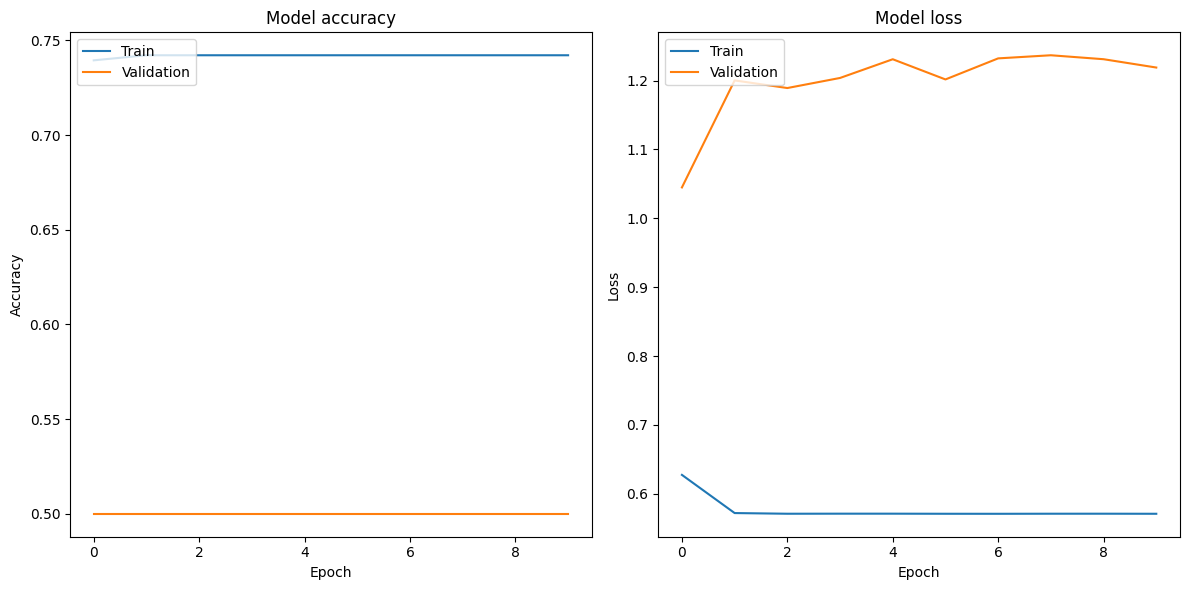

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()